# Coffee Shop Sales
This data is from Maven Analytics website

In [44]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedabbas757/coffee-sales")

print("Path to dataset files:", path)

Path to dataset files: /Users/hb/.cache/kagglehub/datasets/ahmedabbas757/coffee-sales/versions/1



transaction_id : 개별 트랜잭션을 나타내는 고유 시퀀스 ID
transaction_date : 트랜잭션 날짜(MM/DD/YY)
transaction_time : 트랜잭션의 타임스탬프 (HH:MM:SS)
transaction_qty : 판매된 상품 수량
store_id : 거래가 발생한 커피숍의 고유 ID
store_location : 거래가 발생한 커피전문점 위치
product_id : 판매된 상품의 고유 ID
unit_price : 판매된 상품의 소매 가격
product_category : 상품 카테고리 설명
product_type : 상품 유형에 대한 설명
product_detail : 상품 상세 설명

About this file
category_id : Unique sequential ID representing an individual transaction
category_name : Quantity of items sold
description: Location of the coffee shop where the transaction took place

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import os

files = os.listdir(path)
print("Files in the dataset directory:")
print(files)
excel_file = pd.ExcelFile(os.path.join(path, "Coffee Shop Sales.xlsx"))
print(f"the excel data contains {excel_file.sheet_names}\n")

Files in the dataset directory:
['Coffee Shop Sales.xlsx']
the excel data contains ['Transactions']



In [46]:
#retail_data= pd.read_excel(os.path.join(path, "Coffee Shop Sales.xlsx"), sheet_name="Retail Sales")
retail_data = pd.read_excel(excel_file, sheet_name="Transactions")
print(f"the retail data contains {retail_data.columns}\n")
# Display the first few rows of the dataset
print("First few rows of the retail data:")
print(retail_data.head())
print(f"the retail data contains {retail_data.shape[0]} rows and {retail_data.shape[1]} columns\n")
# Display the data types of each column 
print("Data types of each column:")
print(retail_data.dtypes)


the retail data contains Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

First few rows of the retail data:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59     

In [47]:
# check out missing values & redundant rows
print("Missing values in each column:")
print(retail_data.isnull().sum())
print("Redundant rows in the dataset:")
print(retail_data.duplicated().sum())

print(f"description of the retail data:\n{retail_data.describe()}\n")

Missing values in each column:
transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64
Redundant rows in the dataset:
0
description of the retail data:
       transaction_id               transaction_date  transaction_qty  \
count   149116.000000                         149116    149116.000000   
mean     74737.371872  2023-04-15 11:50:32.173609984         1.438276   
min          1.000000            2023-01-01 00:00:00         1.000000   
25%      37335.750000            2023-03-06 00:00:00         1.000000   
50%      74727.500000            2023-04-24 00:00:00         1.000000   
75%     112094.250000            2023-05-30 00:00:00         2.000000   
max     149456.000000            2023-06-30 00:00:00         8.000000   
std      43153.600016                            NaN         0.54

In [ ]:
/*
transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
*/

# need to know if a transction has multiple products or not
if (retail_data['transaction_id'].nunique() == retail_data['transaction_id'].count()):
    print("each transaction has only one product")
else:
    print("each transaction has multiple products")

/*
store_id            0
store_location      0

transaction_qty     0
unit_price          0

product_id          0
product_category    0
product_type        0
product_detail      0
*/

SyntaxError: invalid syntax (162907449.py, line 2)

분석 항목 : 피크타임 찾아서 어느 시간대에 주문이 밀리는지 분석
- 지점 별 주문수의 분포를 보고 피크 타임을 확인하고 직원수와 운영시간을 조정
- 일간 시간별 
- 주간 요일별 
- 월간 일별  

transaction_hour     6     7     8     9    10    11    12    13    14    15  \
store_location                                                                 
Astoria              0  4181  4966  5083  5291  3413  3438  3456  3319  3423   
Hell's Kitchen    1676  3455  6909  6767  6957  3598  2442  2625  2754  2505   
Lower Manhattan   2918  5792  5779  5914  6297  2755  2828  2633  2860  3051   

transaction_hour    16    17    18    19   20  
store_location                                 
Astoria           3599  3402  3463  3565    0  
Hell's Kitchen    2691  2818  2608  2402  528  
Lower Manhattan   2803  2525  1427   125   75  


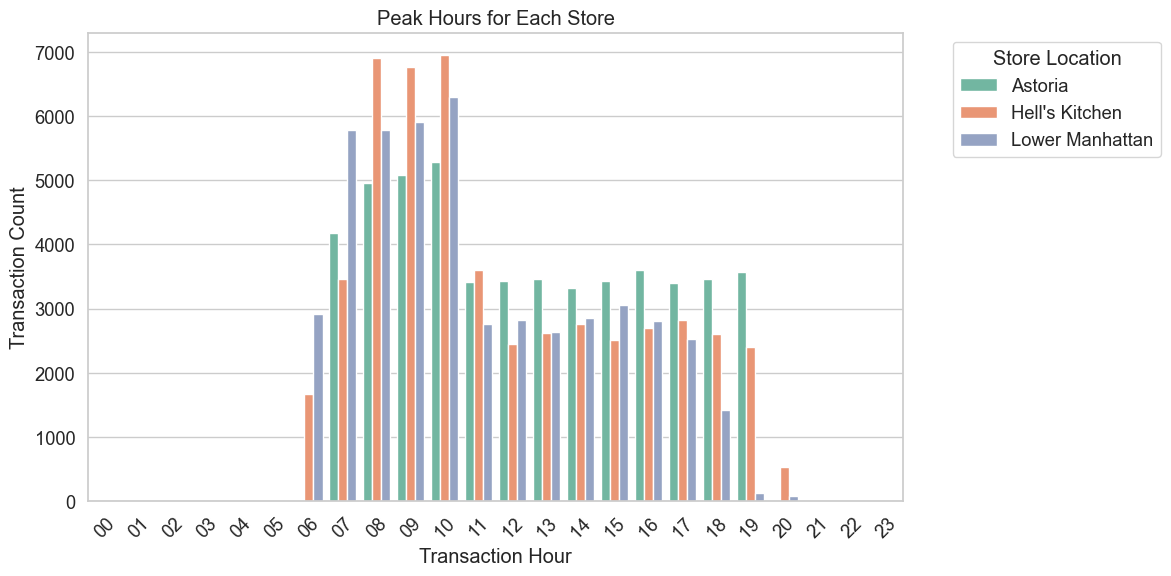

In [ ]:
# check out the peak hours for each store
retail_data['transaction_date'] = pd.to_datetime(retail_data['transaction_date'], format='%Y-%m-%d')
retail_data['transaction_hour'] = pd.to_datetime(retail_data['transaction_time'], format='%H:%M:%S').dt.hour

# check out the peak hours for each store
retail_data['transaction_hour'] = pd.to_datetime(retail_data['transaction_time'], format='%H:%M:%S').dt.hour
 

#get the peak hours for each store and remove hours with zero values
tran_cnt = retail_data['transaction_hour'].sort_values(ascending=True).groupby(retail_data['store_location']).value_counts()
tran_cnt = tran_cnt[tran_cnt > 0]
tran_cnt = tran_cnt.reset_index(name='count')
tran_cnt = tran_cnt.pivot(index='store_location', columns='transaction_hour', values='count')
tran_cnt = tran_cnt.fillna(0).astype(int) # for any missing values, fill with 0 and convert to int
tran_cnt = tran_cnt.reset_index()
tran_cnt = tran_cnt.set_index('store_location')
print(f"{tran_cnt}")

# Reshape the data for plotting
tran_cnt_long = tran_cnt.reset_index().melt(id_vars='store_location', var_name='transaction_hour', value_name='count')
 
tran_cnt_long['transaction_hour'] = tran_cnt_long['transaction_hour'].astype(str)
tran_cnt_long['transaction_hour'] = tran_cnt_long['transaction_hour'].replace({'0': '00', '1': '01', '2': '02', '3': '03', '4': '04', '5': '05', '6': '06', '7': '07', '8': '08', '9': '09'})
tran_cnt_long['transaction_hour'] = tran_cnt_long['transaction_hour'].replace({'10': '10', '11': '11', '12': '12', '13': '13', '14': '14', '15': '15', '16': '16', '17': '17', '18': '18', '19': '19', '20': '20', '21': '21', '22': '22', '23': '23'})
tran_cnt_long['transaction_hour'] = pd.Categorical(tran_cnt_long['transaction_hour'], categories=[str(i).zfill(2) for i in range(24)], ordered=True)
tran_cnt_long = tran_cnt_long.sort_values(by=['store_location', 'transaction_hour'])
tran_cnt_long['count'] = tran_cnt_long['count'].astype(int)
plt.figure(figsize=(12, 6))
sns.barplot(x='transaction_hour', y='count', hue='store_location', data=tran_cnt_long, palette='Set2')
plt.title('Peak Hours for Each Store')
plt.xlabel('Transaction Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("peak_hours.png", dpi=300)
plt.show()


transaction_weekday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
store_location                                                                
Astoria                7403     7032       7370      7427    7352      6942   
Hell's Kitchen         7104     7472       7173      7307    7489      6846   
Lower Manhattan        7136     6698       6767      6920    6860      6722   

transaction_weekday  Sunday  
store_location               
Astoria                7073  
Hell's Kitchen         7344  
Lower Manhattan        6679  


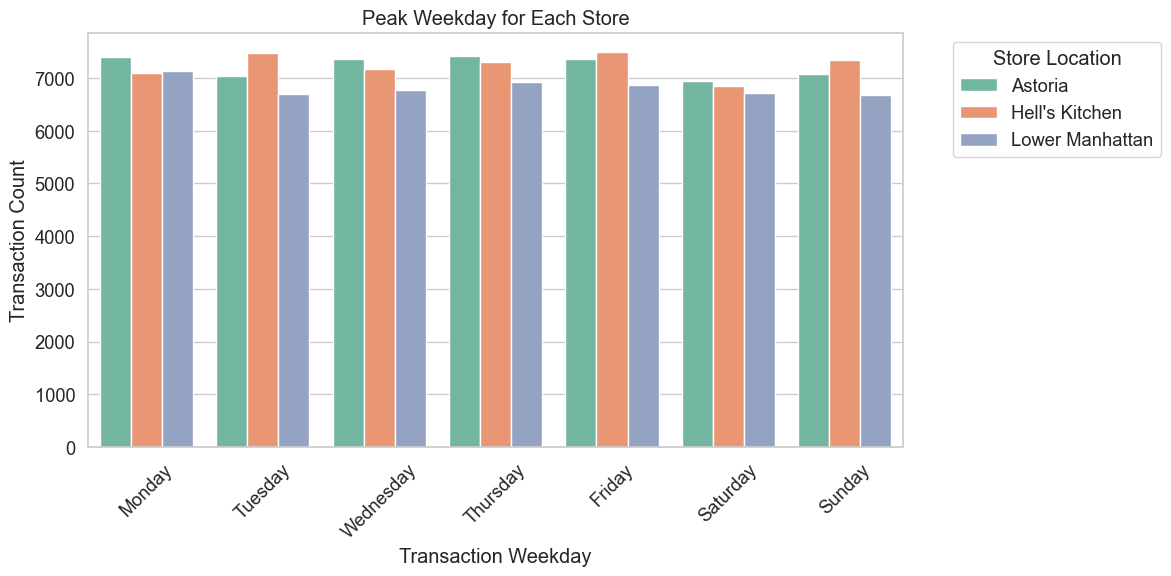

transaction_day    1     2     3     4     5     6     7     8     9     10  \
store_location                                                                
Astoria          1693  1784  1822  1653  1752  1291  1522  1714  1454  1682   
Hell's Kitchen   1577  1637  1616  1501  1454  1519  1916  1826  1940  1876   
Lower Manhattan  1517  1372  1490  1447  1535  1510  1196  1751  1607  1715   

transaction_day  ...    22    23    24    25    26    27    28    29    30  \
store_location   ...                                                         
Astoria          ...  1707  1700  1902  1704  1878  1761  1605  1440  1453   
Hell's Kitchen   ...  1413  1711  1483  1538  1619  1770  1416  1042  1281   
Lower Manhattan  ...  1683  1524  1735  1685  1560  1889  1424  1148  1288   

transaction_day   31  
store_location        
Astoria          742  
Hell's Kitchen   657  
Lower Manhattan  660  

[3 rows x 31 columns]


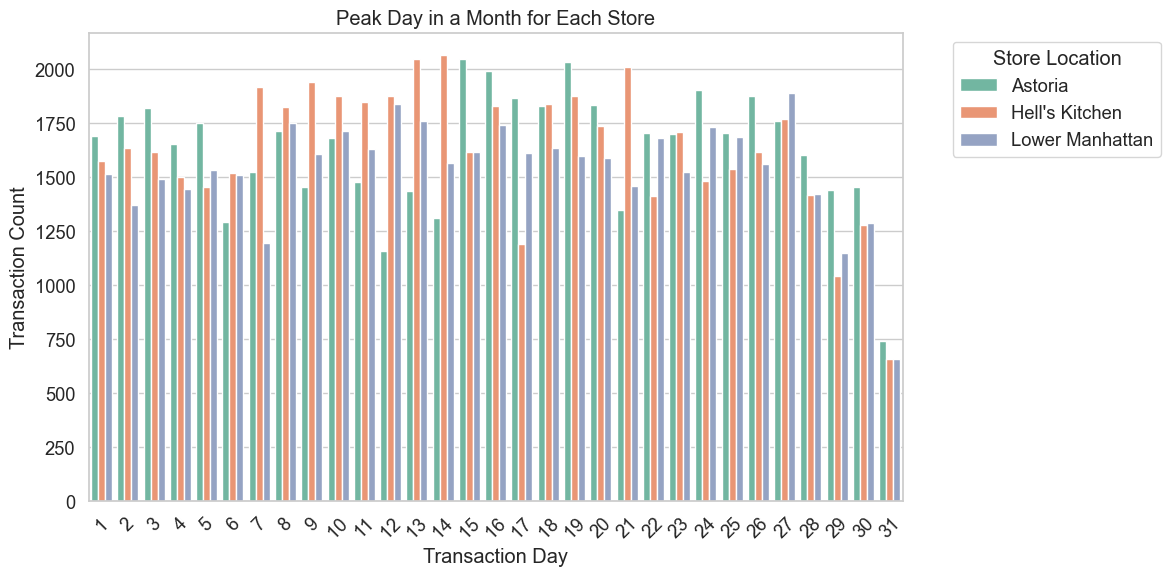

In [50]:
# check out the peak week day for each store
retail_data['transaction_weekday'] = retail_data['transaction_date'].dt.weekday
retail_data['transaction_weekday'] = retail_data['transaction_weekday'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
retail_data['transaction_weekday'] = pd.Categorical(retail_data['transaction_weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
retail_data['transaction_weekday'] = retail_data['transaction_weekday'].astype('category')
# get the peak week day for each store and remove days with zero values
w_tran_cnt = retail_data['transaction_weekday'].sort_values(ascending=True).groupby(retail_data['store_location']).value_counts()
w_tran_cnt = w_tran_cnt[w_tran_cnt > 0]
w_tran_cnt = w_tran_cnt.reset_index(name='count')
w_tran_cnt = w_tran_cnt.pivot(index='store_location', columns='transaction_weekday', values='count')
w_tran_cnt = w_tran_cnt.fillna(0).astype(int) # for any missing values, fill with 0 and convert to int
w_tran_cnt = w_tran_cnt.reset_index()
w_tran_cnt = w_tran_cnt.set_index('store_location')
print(f"{w_tran_cnt}")
# Reshape the data for plotting
w_tran_cnt_long = w_tran_cnt.reset_index().melt(id_vars='store_location', var_name='transaction_weekday', value_name='count')
# plot the data with different colors for each transaction weekday and number on each bar
w_tran_cnt_long['transaction_weekday'] = pd.Categorical(w_tran_cnt_long['transaction_weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
w_tran_cnt_long = w_tran_cnt_long.sort_values(by=['store_location', 'transaction_weekday'])
w_tran_cnt_long['count'] = w_tran_cnt_long['count'].astype(int)
plt.figure(figsize=(12, 6))
sns.barplot(x='transaction_weekday', y='count', hue='store_location', data=w_tran_cnt_long, palette='Set2')
plt.title('Peak Weekday for Each Store')
plt.xlabel('Transaction Weekday')
plt.ylabel('Transaction Count')
plt.legend(title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("peak_weekday.png", dpi=300)
plt.show()

 #check out the peak dat in a month for each store
retail_data['transaction_day'] = retail_data['transaction_date'].dt.day
# get the peak day for each store and remove days with zero values
d_tran_cnt = retail_data['transaction_day'].sort_values(ascending=True).groupby(retail_data['store_location']).value_counts()
d_tran_cnt = d_tran_cnt[d_tran_cnt > 0]
d_tran_cnt = d_tran_cnt.reset_index(name='count')
d_tran_cnt = d_tran_cnt.pivot(index='store_location', columns='transaction_day', values='count')
d_tran_cnt = d_tran_cnt.fillna(0).astype(int) # for any missing values, fill with 0 and convert to int
d_tran_cnt = d_tran_cnt.reset_index()
d_tran_cnt = d_tran_cnt.set_index('store_location')
print(f"{d_tran_cnt}")
# Reshape the data for plotting
d_tran_cnt_long = d_tran_cnt.reset_index().melt(id_vars='store_location', var_name='transaction_day', value_name='count')
# plot the data with different colors for each transaction day and number on each bar
#d_tran_cnt_long['transaction_day'] = pd.Categorical(d_tran_cnt_long['transaction_day'], categories=[str(i).zfill(2) for i in range(1, 32)], ordered=True)
d_tran_cnt_long = d_tran_cnt_long.sort_values(by=['store_location', 'transaction_day'])
d_tran_cnt_long['count'] = d_tran_cnt_long['count'].astype(int)
plt.figure(figsize=(12, 6))
sns.barplot(x='transaction_day', y='count', hue='store_location', data=d_tran_cnt_long, palette='Set2')
plt.title('Peak Day in a Month for Each Store')
plt.xlabel('Transaction Day')
plt.ylabel('Transaction Count')
plt.legend(title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("peak_day.png", dpi=300)
plt.show()

In [ ]:
# check out the peak dat in a month for each store

retail_data['transaction_date'] = pd.to_datetime(retail_data['transaction_date'], format='%Y-%m-%d')
retail_data['transaction_day'] = retail_data['transaction_date'].dt.day


retail_data['transaction_day'] = retail_data['transaction_date'].dt.day_name()
retail_data['transaction_month'] = retail_data['transaction_date'].dt.month_name()

지점의 위치 별 시간대 별 상품 판매율

매출 추이에 따른 지점별 예상 매출

판매 중지 대상 상품 선정 하기 

매출 분석
- 지점 별 매출 추이
- 제품 별 매출 추이 

In [52]:
# check out the total revenue for each product
retail_data['total'] = retail_data['transaction_qty'] * retail_data['unit_price']
# check out the total revenue for each store
print(retail_data.groupby('store_location')['total'].sum().sort_values(ascending=False)) # revenue per store
# check out the total revenue for each product
print(retail_data.groupby('product_id')['total'].sum().sort_values(ascending=False).head(10)) #top 10 products by total revenue

# check out the total revenue for each product category
print(retail_data.groupby('product_category')['total'].sum().sort_values(ascending=False)) # revenue per product category
# check out the total revenue for each product type
print(retail_data.groupby('product_type')['total'].sum().sort_values(ascending=False)) # revenue per product type


store_location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: total, dtype: float64
product_id
61    21151.75
59    21006.00
39    19112.25
41    17641.75
55    17384.00
38    17257.50
36    16481.25
60    16233.75
40    15997.50
27    15109.50
Name: total, dtype: float64
product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: total, dtype: float64
product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Brewed herbal tea        47539.50
Premium brewed coffee    38781.15
Organic brewed coffee    37746.50
Scone                    36866.12
Drip coffee              3198

In [ ]:
h_trans_aggs = retail_data.groupby(['store_location', 'transaction_hour']).agg(['min','max','mean']]).reset_index()